In [8]:
# Incase we have to clear all variables
%reset -f

In [1]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
colourWheel =['#329932',
            '#ff6961',
            'b',
            '#6a3d9a',
            '#fb9a99',
            '#e31a1c',
            '#fdbf6f',
            '#ff7f00',
            '#cab2d6',
            '#6a3d9a',
            '#ffff99',
            '#b15928',
            '#67001f',
            '#b2182b',
            '#d6604d',
            '#f4a582',
            '#fddbc7',
            '#f7f7f7',
            '#d1e5f0',
            '#92c5de',
            '#4393c3',
            '#2166ac',
            '#053061']

from SES_setup import *
from utils import *
from style import *

YES


### Example Liouvillian

In [2]:
import time
import heatmap_setup as hm
import numpy as np


w_2 = 1.4*ev_to_inv_cm
bias = 0.01*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = 0.01*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 200./pi
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
N =4
wc = 100.
w_0 = 200.
site_basis = True
Gamma = (w_0**2)/wc
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                      V = V, alpha=alpha,
                      T_EM=6000., T_ph =300., alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=2*N)



In [9]:

H, L = get_H_and_L(PARAMS, silent=False, threshold=1e-7)

****************************************************************
The operators took 1.84512901306 and have dimension 48.
Building the RC Liouvillian took 1.940 seconds.
It is 2304by2304. The full basis would be 2304by2304
It took  1.18283104897  seconds to build the Non-secular RWA Liouvillian
Chopping reduced the sparsity from 8.028% to 7.405%


In [12]:
ssL, info = hm.calculate_steadystate(H, L, method="power", persistent=True)
exps = make_expectation_operators(PARAMS, site_basis=site_basis)

ss_therm = thermal_state(PARAMS["T_EM"], H[1])
for key, op in exps.items():
    if 'RC' not in key:
        if 'coherence' in key:
            res, therm = (ssL*op).tr(), (ss_therm*op).tr()
        else:
            res, therm = (ssL*op).tr().real, (ss_therm*op).tr().real
        print "{} : {} \t | \t {} \t | \t {}".format(key, res, therm, abs(res - therm))

Steady state took 0.413 seconds with power


IndexError: invalid index

In [ ]:
print_PARAMS(PARAMS)

## Inspecting how sparsity and $\textit{chopping}$ affect structure and solution time

In [ ]:
H, L = get_H_and_L(PARAMS, silent=False, threshold=0)
ssL, infoL = calculate_steadystate(H, L, method="power", persistent=True)
H, L_tidy = get_H_and_L(PARAMS, silent=False, threshold=1e-7)
ssLt, infoLt = calculate_steadystate(H, L_tidy, method="power", persistent=True)

print "Total error per nz dm element due to chop: {}".format(np.sum((ssL.full()-ssLt.full())**2)/nonzero_elements(ssL)) 

visualise_dense(ssL)
visualise_dense(ssLt)

visualise_sparse(L)
visualise_sparse(L_tidy)


# Excitation restriction

In [ ]:
reload(hm)
ss, info = hm.calculate_converged_steadystate(PARAMS, conv_percent_tol=0.1, etol=1e-8, 
                                   method="direct", observable='sigma_x')

In [3]:
x_values = [5/pi, 20/pi, 80/pi, 160/pi]
y_values = [77., 150., 300.]

ss_array, info_array = hm.heat_map_calculator(PARAMS,
                            x_axis_parameters=['alpha_1', 'alpha_2'],
                            y_axis_parameters=['T_1', 'T_2'],
                            x_values=x_values,
                            y_values=y_values,
                            dir_name='heatmap_TphvAlpha', save_data=True,
                            persistent=False, method='direct', threshold=3e-7)

Steady state for 3 took 0.030 seconds with direct, sigma_x changed by 306.6831%
Steady state for 4 took 0.122 seconds with direct, sigma_x changed by 0.0067%
calculation converged
Steady state for 3 took 0.030 seconds with direct, sigma_x changed by 231.2995%
Steady state for 4 took 0.130 seconds with direct, sigma_x changed by 0.0805%
Steady state for 5 took 0.620 seconds with direct, sigma_x changed by 0.0050%
calculation converged
Steady state for 3 took 0.018 seconds with direct, sigma_x changed by 138.7907%
Steady state for 4 took 0.108 seconds with direct, sigma_x changed by 1.3160%
Steady state for 5 took 0.584 seconds with direct, sigma_x changed by 0.1645%
Steady state for 6 took 3.188 seconds with direct, sigma_x changed by 0.0164%
Steady state for 7 took 16.840 seconds with direct, sigma_x changed by 0.0014%
calculation converged
Steady state for 3 took 0.023 seconds with direct, sigma_x changed by 135.5575%
Steady state for 4 took 0.155 seconds with direct, sigma_x changed 

In [ ]:
x_values = [5/pi, 20/pi, 80/pi, 160/pi]
y_values = [77., 150., 300.]

ss_array, info_array = hm.heat_map_calculator(PARAMS,
                            x_axis_parameters=['alpha_1', 'alpha_2'],
                            y_axis_parameters=['T_1', 'T_2'],
                            x_values=x_values,
                            y_values=y_values,
                            dir_name='heatmap_TphvAlpha', save_data=True,
                            persistent=False, method='direct', threshold=3e-7)

In [ ]:
import heatmap_setup as hm

x_values=[3,4,5,6,7,8,9,10] # N
y_values=[0] # exc_diff (exc =  +exc_diff)
method='direct'
ss_array, info_array = hm.heat_map_calculator(PARAMS,
                            x_axis_parameters=['N_1', 'N_2'],
                            y_axis_parameters=['exc_diff'],
                            x_values=x_values,
                            y_values=y_values,
                            dir_name='heatmap_excvN', save_data=True,
                            persistent=False, method=method, threshold=1e-6)

In [ ]:
def fit_f(x_vals, y_vals):
    return sp.optimize.curve_fit(f, x_vals, y_vals)[0]

def f(x, a, b, c):
    return a*np.exp(-b*x)-c

def calc_f(x, fp):
    return f(x, fp[0], fp[1], fp[2])

obs_operator='sigma_x'
ss_array, PARAMS, info_arr = heatmap_loader(11, dir_name="heatmap_excvN")
ss_obs_array = steadystate_observable(ss_array, PARAMS, obs_operator)
X_values = np.array(PARAMS['x_values'])
fit_params = fit_f(X_values[3::], ss_obs_array[0][3::])

plt.plot(X_values, ss_obs_array[0])
x_proj = np.arange(3,15)
fit_proj = calc_f(x_proj, fit_params)
print ("Converged {} is {}".format(obs_operator, max(fit_proj)))

percent_change = []
for i in range(len(fit_proj)-1):
    percent_change.append(100*(fit_proj[i]-fit_proj[i+1])/fit_proj[i+1])
plt.plot(x_proj, fit_proj)

In [38]:
ss_arr_test, PARAMS, info_test = heatmap_loader(1, dir_name="heatmap_TphvAlpha")

In [ ]:
heatmap_plotter(num=12, plot_SD=False, dir_name="heatmap_excvN",
                print_params=False, observable='sigma_x')

In [ ]:
heatmap_plotter(num=11, plot_SD=False, dir_name="heatmap_excvN",
                print_params=False, observable='sigma_x')

In [ ]:
ss_info_params = [ss_array, info_array, PARAMS]

#heatmap_plotter(ss_info_params=ss_info_params, plot_SD=False,
#                print_params=False, observable='sigma_x')
heatmap_plotter(num=5, plot_SD=False, dir_name="heatmap_excvN",
                print_params=False, observable='sigma_x')

In [ ]:
plt.imshow(steadystate_observable(ss_array, PARAMS, 'sigma_x'))

In [3]:

def steadystate_observable(ss_array, PARAMS, observable):
    ss_obs_array = np.zeros(shape=ss_array.shape)
    for y, ss_row in enumerate(ss_array):
        for x, ss_dm in enumerate(ss_row):
            dim, size = ss_dm.dims[0][1::], int(ss_dm.shape[0]/PARAMS['sys_dim'])
            
            nstates, state2idx, idx2state = qt.enr_state_dictionaries(dim, dim[0]+0)
            exc_diff = 0 # function finds the correct exc_diff given some dm
            while nstates != size:
                nstates, state2idx, idx2state = qt.enr_state_dictionaries(dim, dim[0]+exc_diff)
            
            #print exc_diff, dim[0]+exc_diff
            PARAMS.update({'N_1':dim[0], 'N_2':dim[1], 'exc':dim[0]+exc_diff})
            obs_op = make_expectation_operators(PARAMS)[observable]
            #print obs_op.shape, ss_dm.shape
            ss_obs_array[y][x] = (obs_op*ss_dm).tr().real #info_test[y][x]['solution_time']
    return ss_obs_array

#print ss_arr_test[0][0]
#steadystate_observable(ss_arr_test, PARAMS, 'sigma_x')

In [9]:
# With saved data, we can calculte things differently
def _steadystate_observable(ss_array, PARAMS, observable):
    try:
        size = (len(PARAMS['y_values']), len(PARAMS['x_values']))
    except KeyError:
        size = (1,1)
    # deal with the case where N is being changed as an x value
    if 'N_1' in PARAMS['x_axis_parameters']:
        data_array = np.zeros(size)         # Collect data
        N_values = PARAMS['x_values']
        # NEw observable operator for each N value
        for i, N in enumerate(N_values):
            PARAMS.update({'N_1' : N, 'N_2' : N})
            exc = N+PARAMS['exc_diff']
            # Leave it so exc can be fixed or a y_parameter
            if 'exc' in PARAMS['x_axis_parameters']:
                PARAMS.update({'exc': exc})
            _obs_op = make_expectation_operators(PARAMS)[observable]
            for j, y in enumerate(PARAMS['y_values']):
                # the case where exc is on the y axis
                if 'exc_diff' in PARAMS['y_axis_parameters']:
                    PARAMS.update({'exc': N+y})
                    _obs_op = make_expectation_operators(PARAMS)[observable]
                try:
                    #print j,i ,ss_array[j][i].shape, _obs_op.shape
                    data_array[j][i] = (qt.Qobj(ss_array[j][i])*_obs_op).tr().real
                except AttributeError:
                    data_array[j][i] = np.nan
        return data_array
    else:
        # Much simpler if N isn't on the x-axis
        obs_op = make_expectation_operators(PARAMS)[observable]
        f = lambda x: (qt.Qobj(x)*obs_op).tr()
        ss_array = np.reshape(ss_array, (1, size[0]*size[1]))[0]

        data_array = map(f, ss_array)
        data_array = np.array(data_array).reshape(size).real
        return data_array


def heatmap_loader(num, dir_name="heatmap"):
    directory = 'DATA/'+dir_name+'_'+str(num)
    ss_array = load_obj(directory+'/ss_array')
    PARAMS = load_obj(directory+'/PARAMS')
    info_array = load_obj(directory+'/info_array') # reverse ordering -> lower_N-higher_N
    return ss_array, PARAMS, info_array

def heatmap_plotter(ss_info_params=False, num=-1, plot_SD=True, dir_name="heatmap", 
                     print_params=False, observable='sigma_x'):
    if num>=0:
        ss_array, PARAMS, info_array = heatmap_loader(num, dir_name=dir_name)
        
    if ss_info_params:
        if num>=0:
            print "Not loading saved data, using data from arguments instead"
        ss_array, info_array, PARAMS = ss_info_params[0], ss_info_params[1], ss_info_params[2]
    info = info_array[0][0]
    #print info
    
    try:
        # To catch an old bug where these were in "info" not in PARAMS
        keys = ['x_values', 'y_values', 'y_axis_parameters', 'x_axis_parameters']
        PARAMS.update(dict((key, info[key]) for key in keys))
    except Exception as err:
        print "plotting in new style"
    if plot_SD:
        plot_UD_SD(PARAMS["Gamma_1"], PARAMS["alpha_1"], PARAMS["w0_1"], eps=8000.)
    #print PARAMS
    ss_array = steadystate_observable(ss_array, PARAMS, observable)
    
    f, axes = plt.subplots(1,1, figsize=(13,6))
    ylab = ' = '.join(["$"+l+"$" for l in PARAMS['y_axis_parameters']])
    for i, y_val in enumerate(PARAMS['y_values']):
        x_values = PARAMS['x_values']

        
        axes.plot(x_values, ss_array[i], 
                  label=ylab+"="+str(y_val))
    if print_params:
        print_PARAMS(PARAMS)
    labs = ("$\\"+l+"$" for l in PARAMS['x_axis_parameters'])
    xlab = ' , '.join(labs)
    
    plt.xlabel(xlab+" (cm$^{-1}$)")
    #plt.xlabel(', '.join(PARAMS['x_axis_parameters']))
    plt.ylabel(r"Steadystate "+make_expectation_labels()[observable])
    #plt.ylabel(', '.join(info['y_axis_parameters']))
    plt.legend()
    plt.grid()
    plot_filename = 'PLOTS/'+dir_name+'_'+str(num)+'.pdf'
    plt.savefig(plot_filename,bbox_inches='tight')
    print "saved at {}".format(plot_filename)
    plt.show()

plotting in new style
saved at PLOTS/heatmap_TphvAlpha_1.pdf


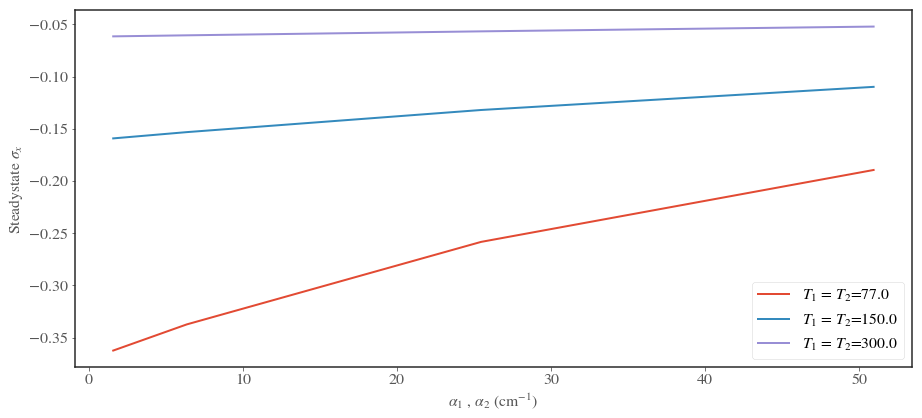

In [11]:
heatmap_plotter(num=1, plot_SD=False, dir_name="heatmap_TphvAlpha",
                print_params=False, observable='sigma_x')

In [112]:
def populations_plotter(ss_info_params=False, num=-1, plot_SD=True, dir_name="heatmap", 
                     print_params=False, observable='sigma_x'):
    if num>=0:
        ss_array, PARAMS, info_array = heatmap_loader(num, dir_name=dir_name)
        
    if ss_info_params:
        if num>=0:
            print "Not loading saved data, using data from arguments instead"
        ss_array,info_array, PARAMS = ss_info_params[0], ss_info_params[1], ss_info_params[2]
    info = info_array[0][0]
    #print info
    
    try:
        # To catch an old bug where these were in "info" not in PARAMS
        keys = ['x_values', 'y_values', 'y_axis_parameters', 'x_axis_parameters']
        PARAMS.update(dict((key, info[key]) for key in keys))
    except Exception as err:
        print "plotting in new style"
    if plot_SD:
        plot_UD_SD(PARAMS["Gamma_1"], PARAMS["alpha_1"], PARAMS["w0_1"], eps=8000.)
    #print PARAMS
    ss_array = steadystate_observable(ss_array, PARAMS, observable)
    
    f, axes = plt.subplots(1,1, figsize=(13,6))
    for i, y_val in enumerate(PARAMS['y_values']):
        x_values = PARAMS['x_values']

        axes.plot(x_values, ss_array[i], 
                  label=str(PARAMS['y_axis_parameters'])+"="+str(y_val))
    if print_params:
        print_PARAMS(PARAMS)
    
    plt.xlabel(r', ($cm^{-1}$)'.join(r"\\"+PARAMS['x_axis_parameters']))
    plt.ylabel("Steadystate "+observable)
    #plt.ylabel(', '.join(info['y_axis_parameters']))
    plt.legend()
    plt.grid()
    plot_filename = 'PLOTS/'+dir_name+'_'+str(num)+'.pdf'
    plt.savefig(plot_filename)
    print "saved at {}".format(plot_filename)
    plt.show()

In [ ]:
ss_info_params = [ss_array, info_array, PARAMS]

heatmap_plotter(ss_info_params=ss_info_params, plot_SD=False,
                print_params=False, observable='sigma_x')

# For N=6, with no 

In [ ]:
"""from heatmap_setup import steadystate

w_2 = 8000.
alpha = 20.

N = 6
pap = alpha_to_pialpha_prop(alpha, w_2)
PARAMS = PARAMS_setup(bias=100., w_2=8000., V = 100., pialpha_prop=pap,
                                 T_EM=6000., T_ph =300.,
                                 alpha_EM=0.1, shift=True,
                                 num_cpus=3, N=N, Gamma=200., w_0=300.,
                                 silent=True, exc_diff=0)
from numpy.linalg import norm
def estimateCondition(M):
    vec = np.ones((1, M.shape[0])).T
    return norm(M.dot(vec), np.inf)"""

# Comparing SS solution methods (direct, inverse power, eigen)

In [ ]:
from qutip import build_preconditioner

def method_plotter(N_vals, data_dict, info_dict, ax1, ax2, linestyle="solid"):
    lw=1.
    if linestyle == 'dashed':
        lw=1.8
    for i, key in enumerate(data_dict.keys()):
        ax1.plot(N_vals, data_dict[key], label=key, color=colourWheel[i], ls=linestyle, linewidth=lw)
        #print info_dict[key]
        ax2.plot(N_vals, info_dict[key], label=key, color=colourWheel[i], ls=linestyle, linewidth=lw)
    ax1.legend()
    ax2.legend()
    ax1.set_ylabel("Coherence")
    ax2.set_ylabel("Solution time")


def method_comparison(N_i, N_f, plot=False, site_basis=True):
    methods = ['direct']
    data_dict = dict()
    info_dict = dict()
    N_vals = range(N_i, N_f)
    for exc_diff in [0,3,4]:
        for N in N_vals:
            PARAMS.update({'N_1':N, 'N_2':N, 'exc':int(2*N-exc_diff)})
            H, L = get_H_and_L(PARAMS,silent=False, threshold=1e-7, site_basis=site_basis)
            exps = make_expectation_operators(PARAMS, site_basis=site_basis)
            for method in methods:
                try:
                    M=None

                    if "iterative" in method:
                        ti = time.time()
                        M = build_preconditioner(H[1], [L], use_rcm=True, ILU_MILU='smilu_2')
                        print("Building preconditioner took {} seconds".format(time.time()-ti))
                    ss, full_info = calculate_steadystate(H, L, method=method, persistent=True)
                    info = full_info['solution_time']

                    coh = (exps['sigma_x']*ss).tr().real
                    try:
                        data_dict[exc_diff].append(coh)
                        info_dict[exc_diff].append(info)
                    except KeyError:
                        data_dict[exc_diff] = [coh]
                        info_dict[exc_diff] = [info]
                except Exception as err:
                    print( "{} failed due to : {}".format(method, err))
                    try:
                        data_dict[exc_diff].append(None)
                        info_dict[exc_diff].append(None)
                    except KeyError:
                        data_dict[exc_diff] = [None]
                        info_dict[exc_diff] = [None]
    #if plot:
    #    method_plotter(N_vals, data_dict, info_dict)
    return N_vals, data_dict, info_dict

N_vals, data_dict_sb, info_dict_sb = method_comparison(3,7)
#N_vals, data_dict_eb, info_dict_eb = method_comparison(3,7, site_basis=False)

f, (ax1, ax2) = plt.subplots(2,1, figsize=(10,7))
method_plotter(N_vals, data_dict_sb, info_dict_sb, ax1, ax2)
#method_plotter(N_vals, data_dict_eb, info_dict_eb, ax1, ax2, linestyle="dashed")


# Plotting methods

In [ ]:
heatmap_plotter(2, plot_SD=False, dir_name='heatmap_excvN', 
                     print_params=False, observable='')